In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("./data/Pricing Push Ups - data.csv")
df.describe()

,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
count,2.380000e+02,238.000000,223.000000
mean,5.858680e+04,34.103754,4008.708520
std,1.565780e+05,40.741338,10131.364522
min,1.000000e+00,3.500000,2.000000
25%,1.669250e+03,11.835471,125.000000
50%,6.328500e+03,21.288226,498.000000
75%,3.833075e+04,44.381888,3215.000000
max,1.844512e+06,329.733729,79424.000000


In [3]:
df.isnull().sum()

category_2                1
category_3                8
number_of_listings        0
avg_listing_price_eur     0
revenue_from_push_ups    15
dtype: int64

### Missing values in category 2 and revenue_from_push_ups
- Filling missing category with `Others`
- Filling missing `revenue_from_push_ups` with 0

In [4]:
df.category_2 = df.category_2.fillna("Others")
df.category_3 = df.category_3.fillna("Others")
df.revenue_from_push_ups = df.revenue_from_push_ups.fillna(0)
# Merge 2 categories
df["all_category"] = df["category_2"] + "_" + df["category_3"]

In [5]:
group_df = df.groupby("all_category").agg({"number_of_listings": "sum",
                                          "revenue_from_push_ups": "sum"
                                          }).reset_index()
group_df["avg_pushup_revenue_per_listing"] = group_df["revenue_from_push_ups"] / group_df["number_of_listings"]

In [6]:
group_df = group_df.sort_values(by='revenue_from_push_ups', ascending=False)
group_df["revenue_from_push_ups_cumsum"] = group_df["revenue_from_push_ups"].cumsum()
group_df["perc_revenue_from_push_ups_cumsum"] = 100.0*group_df["revenue_from_push_ups_cumsum"] / group_df["revenue_from_push_ups"].sum()
group_df["perc_revenue_from_push_ups"] = 100.0*group_df["revenue_from_push_ups"] / group_df["revenue_from_push_ups"].sum()
display(group_df.iloc[:20])

,all_category,number_of_listings,revenue_from_push_ups,avg_pushup_revenue_per_listing,revenue_from_push_ups_cumsum,perc_revenue_from_push_ups_cumsum,perc_revenue_from_push_ups
222,WOMENS_DRESSES,860056,79424.0,0.092347,79424.0,8.884693,8.884693
234,WOMENS_TOPS_T_SHIRTS,1844512,76166.0,0.041293,155590.0,17.404932,8.520240
227,WOMENS_OUTERWEAR,377058,57032.0,0.151255,212622.0,23.784765,6.379832
228,WOMENS_PULLOVERS_SWEATERS,713152,47128.0,0.066084,259750.0,29.056695,5.271930
105,FOOTWEAR_W_TRAINERS,289412,43358.0,0.149814,303108.0,33.906898,4.850203
223,WOMENS_JEANS,330765,25316.0,0.076538,328424.0,36.738849,2.831951
221,WOMENS_COATS_JACKETS,241954,25214.0,0.104210,353638.0,39.559390,2.820541
230,WOMENS_SKIRTS,429820,23660.0,0.055046,377298.0,42.206094,2.646704
39,BAGS_BACKPACKS_HANDBAGS,184771,23136.0,0.125214,400434.0,44.794181,2.588087
95,FOOTWEAR_HIGH_HEELS,240912,23110.0,0.095927,423544.0,47.379360,2.585179


In [7]:
display(group_df[group_df.revenue_from_push_ups == 0][["all_category", "number_of_listings", "revenue_from_push_ups"]])

,all_category,number_of_listings,revenue_from_push_ups
125,GIR_SETS_Others,2594,0.0
78,COSMETICS_AND_BEAUTY_ITEMS_HAIR_CARE,30,0.0
82,COSMETICS_AND_BEAUTY_ITEMS_MEN_COS_OTH_COSMETICS,11,0.0
84,COSMETICS_AND_BEAUTY_PRODUCTS_BEAUTY_HAND_ONLY,2,0.0
92,COSMETICS_AND_BEAUTY_PRODUCTS_W_HAIR_COSMETICS,13,0.0
79,COSMETICS_AND_BEAUTY_ITEMS_HAND_NAIL_CARE,4,0.0
171,MEN_SHOES_NEW_MEN_SLIPPERS_FLIPFLOPS,61,0.0
75,CLO_SETS_Others,1786,0.0
80,COSMETICS_AND_BEAUTY_ITEMS_MAKE_UP,7,0.0
4,ACCESSORIES_JEWELLERY_KEY_RINGS,5,0.0


- 60% of revenue from pushups are coming from top 20 categories (10% of total categories)
- Some categories like `GIR_SETS_Others`, `CLO_SETS_Others` (undefined category 3) have high number of listings but no revenue from pushups

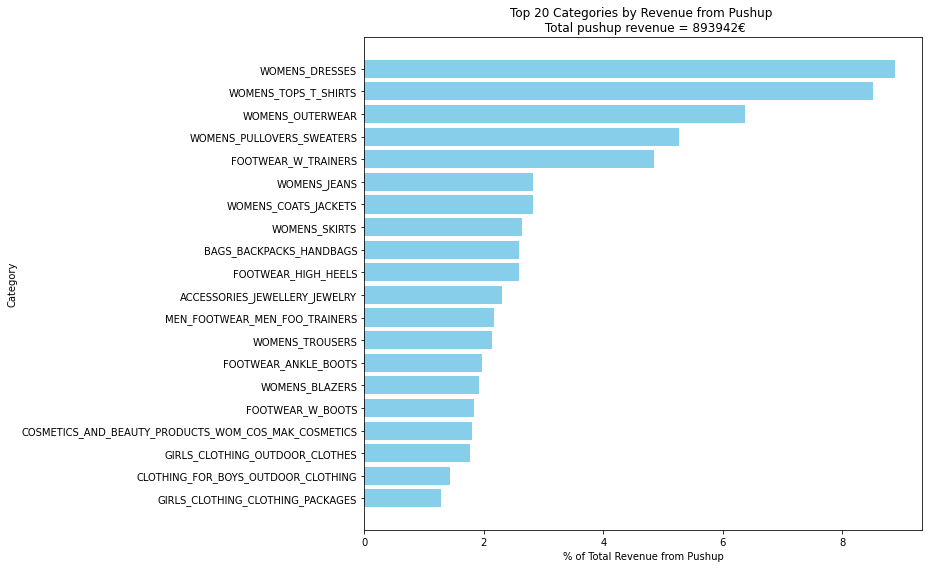

In [8]:

plot_df = group_df.sort_values(by='perc_revenue_from_push_ups', ascending=True)

top20 = plot_df.iloc[-20:]

plt.figure(figsize=(13, 8))
plt.barh(top20["all_category"], top20['perc_revenue_from_push_ups'], color='skyblue')


plt.title(f'Top 20 Categories by Revenue from Pushup \n Total pushup revenue = {round(group_df["revenue_from_push_ups"].sum())}€')
plt.xlabel('% of Total Revenue from Pushup')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

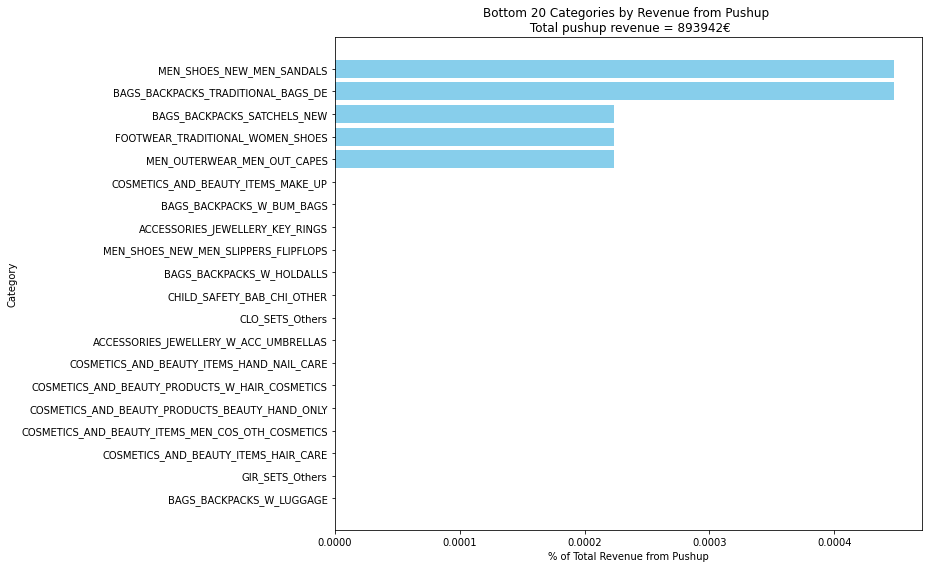

In [9]:

plot_df = group_df.sort_values(by='perc_revenue_from_push_ups', ascending=True)

bottom20 = plot_df.iloc[:20]

plt.figure(figsize=(13, 8))
plt.barh(bottom20["all_category"], bottom20['perc_revenue_from_push_ups'], color='skyblue')


plt.title(f'Bottom 20 Categories by Revenue from Pushup \n Total pushup revenue = {round(group_df["revenue_from_push_ups"].sum())}€')
plt.xlabel('% of Total Revenue from Pushup')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

- From the graph, we can see that the top categories generating the most revenue are `FOOTWEAR_W_TRAINERS`, `WOMENS_DRESSES`, and `WOMENS_TOPS_T_SHIRTS`. This suggests that the "push up" feature is performing well in these categories.

# To assess room for improvement, let's calculate the revenue per listing for each category:

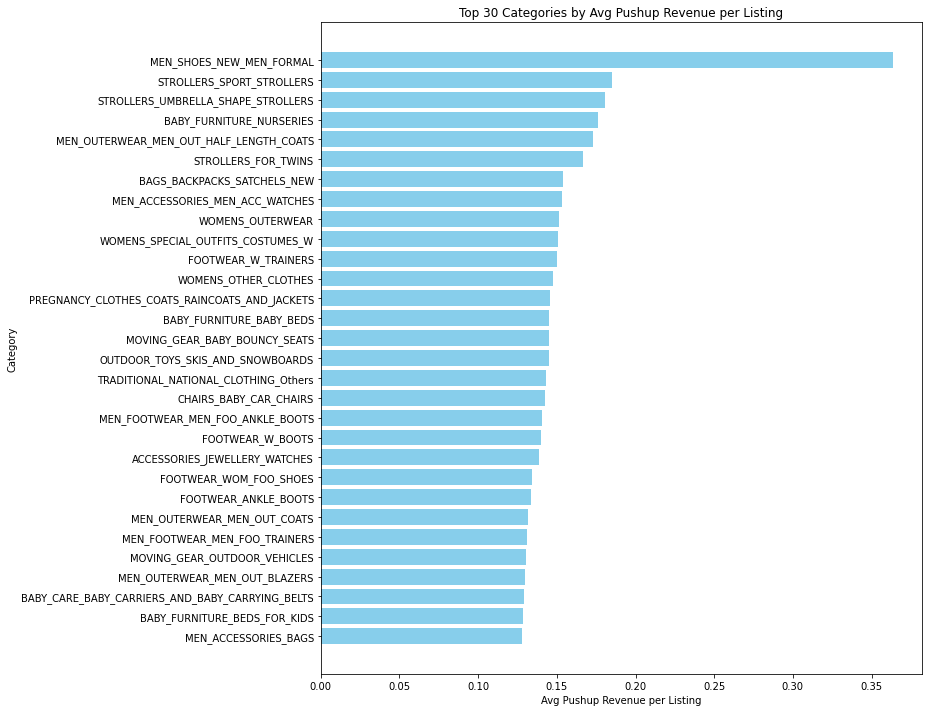

In [10]:
plot_df = group_df.sort_values(by='avg_pushup_revenue_per_listing', ascending=True)

top30 = plot_df.iloc[-30:]

plt.figure(figsize=(13, 10))
plt.barh(top30["all_category"], top30['avg_pushup_revenue_per_listing'], color='skyblue')


plt.title(f'Top 30 Categories by Avg Pushup Revenue per Listing')
plt.xlabel('Avg Pushup Revenue per Listing')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

- Some categories have a higher revenue per listing compared to others. This indicates potential for optimizing the pricing strategy based on category-specific factors.

### DYNAMIC PRICING MODEL

Of course, keeping a fixed "push up" price throughout the platform is simple and ease for sellers, However:
* it doesn't account for category-specific factors like average listing price and competition
* May deter sellers in lower-priced categories from using the feature
* Potential loss of revenue in high-demand, high-priced categories
* No personalization
* For example, there’re miss opportunities where some categories like `GIR_SETS`, `CLO_SETS` (undefined category 3) have a high number of listings (> 1000) but no revenue from
pushups.
* Less adaptive to market dynamics. For example, there's a sudden surge in demand for the “Orange-Sport” clothes thanks to the Netherlands playing in Euro 2024. Sellers would like to pay more than 2€ to promote their listings on the trend. A fixed pricing model may not be the best case here.

Hence, an alternative pricing strategy could be a dynamic pricing model based on:
* Category-specific
* Number of listing
* Avg Listing Price

Pros:
* High Adaptability based on demand/market or seasonality
* Maximize Revenue Opportunities: charging more for high-demand categories and less for low-demand ones → fairness in term of perceived value
* More option for personalization to align with seller needs and use case
Cons:
* Higher cost of maintenance, monitoring and implementation in the system due to complex logic. Financial revenue prediction model also needs to adjust with dynamic pricing → more challenging in financial planning.
* Dynamic pricing is a black box for sellers. It can lead to mistrust and confusion when sellers do not fully understand, and no transparency.

For example, the very naive dynamic average listing price of each category:

* Categories with avg. listing price < €10: "Push up" price of €1
* Categories with avg. listing price €10-€50: "Push up" price of €2
* Categories with avg. listing price > €50: "Push up" price of €3

### First check the correlation

##### Number of Listings vs. Revenue Push Ups

Mean Squared Error: 623329.3373482146
R^2 Score: 0.6243907254793324
Model: Y = 0.05051446120539562 * X + 165.3598913434123


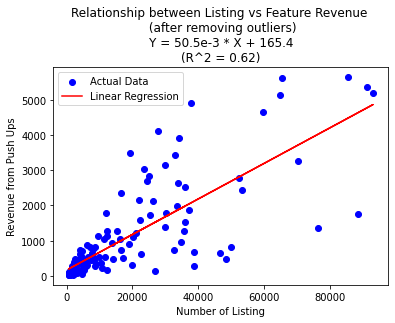

In [11]:
# Define the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Calculate Q1, Q3, and IQR for X
X_var = "number_of_listings"
Q1_X = np.percentile(df[X_var], 25)
Q3_X = np.percentile(df[X_var], 75)
IQR_X = Q3_X - Q1_X
x_lower = max(Q1_X - threshold*IQR_X, np.percentile(df[X_var], 15))
x_upper = min(Q3_X + threshold*IQR_X, np.percentile(df[X_var], 85))

# Calculate Q1, Q3, and IQR for Y
Y_var = "revenue_from_push_ups"
Q1_Y = np.percentile(df[Y_var], 25)
Q3_Y = np.percentile(df[Y_var], 75)
IQR_Y = Q3_Y - Q1_Y
y_lower = max(Q1_Y - threshold*IQR_Y, np.percentile(df[Y_var], 15))
y_upper = min(Q3_Y + threshold*IQR_Y, np.percentile(df[Y_var], 85))

# Remove outliers
train_df = df[(df[X_var] >= x_lower) & (df[X_var] <= x_upper) 
              & (df[Y_var] >= y_lower) & (df[Y_var] <= y_upper)]

X = train_df[X_var].values.reshape(-1, 1)
Y = train_df[Y_var].values

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)


mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print(f"Model: Y = {model.coef_[0]} * X + {model.intercept_}")


plt.figure()
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Linear Regression')
plt.xlabel('Number of Listing')
plt.ylabel('Revenue from Push Ups')
plt.title(f'Relationship between Listing vs Feature Revenue \n (after removing outliers)\nY = {round(1000*model.coef_[0], 1)}e-3 * X + {round(model.intercept_, 1)}\n(R^2 = {round(r2, 2)})')
plt.legend()
plt.show()

- We can observe the revenue of the feature are highly correlated with the category competitiveness (number of listing). The correlation is ~0.87
- For each additional listing, the revenue from push-ups is expected to increase by approximately 0.0505€ 


##### Listing Price vs Pushup Revenue

Mean Squared Error: 995366.7931676998
R^2 Score: 0.030018733949238485
Model: Y = 16.911422505355333 * X + 496.7585175438127


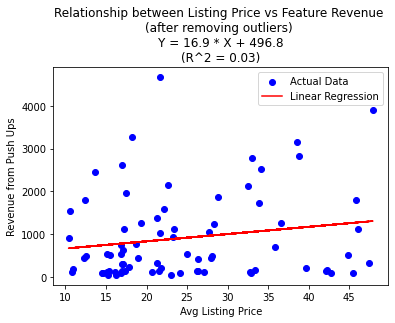

In [12]:
# Define the threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Calculate Q1, Q3, and IQR for X
X_var = "avg_listing_price_eur"
Q1_X = np.percentile(df[X_var], 25)
Q3_X = np.percentile(df[X_var], 75)
IQR_X = Q3_X - Q1_X
x_lower = max(Q1_X - threshold*IQR_X, np.percentile(df[X_var], 20))
x_upper = min(Q3_X + threshold*IQR_X, np.percentile(df[X_var], 80))

# Calculate Q1, Q3, and IQR for Y
Y_var = "revenue_from_push_ups"
Q1_Y = np.percentile(df[Y_var], 25)
Q3_Y = np.percentile(df[Y_var], 75)
IQR_Y = Q3_Y - Q1_Y
y_lower = max(Q1_Y - threshold*IQR_Y, np.percentile(df[Y_var], 20))
y_upper = min(Q3_Y + threshold*IQR_Y, np.percentile(df[Y_var], 80))

# Remove outliers
train_df = df[(df[X_var] >= x_lower) & (df[X_var] <= x_upper) 
              & (df[Y_var] >= y_lower) & (df[Y_var] <= y_upper)]

X = train_df[X_var].values.reshape(-1, 1)
Y = train_df[Y_var].values

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)


mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print(f"Model: Y = {model.coef_[0]} * X + {model.intercept_}")


plt.figure()
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Linear Regression')
plt.xlabel('Avg Listing Price')
plt.ylabel('Revenue from Push Ups')
plt.title(f'Relationship between Listing Price vs Feature Revenue \n(after removing outliers) \nY = {round(model.coef_[0], 1)} * X + {round(model.intercept_, 1)}\n(R^2 = {round(r2, 2)})')
plt.legend()
plt.show()

- For each additional 1€ in listing price, the revenue from push-ups is naively expected to increase by approximately 16.9€ 
- The model performance is not the best. However, for the sake of simplicity, assume this is the relationship we can apply.

### MODELING

The alternative of fixed pricing is dynamic pricing. The dynamic pricing can be based on Category-specific. The weights of Category-specific can be defined based on `Number of listing`, and `Avg Listing Price`

* Keep in mind that for dynamic pricing, we should cap the maximum (willingness to pay from seller)
* The maximum cap per category can be defined as `base_price / avg_listing_price_eur` (%) (`base_price` = 2)
* The `number of listings` in a category are positively correlated to competitiveness and demand. A higher number of listings indicates higher competition for visibility, potentially increasing the value of the "push up" feature. So, high `number of listing` category should have higher weights.
* Also, `avg listing price` reflects the overall value category. Categories with higher average listing prices may suggest higher-end product, where sellers may be willing to pay more to promote their listings.
* However, based on the data, `number of listings` have high correlation with revenue while `avg listing price` doesn't. * Hence, the weight of each category can be defined as `number of listings / avg(number of listings) - 1`.
     - If weights is negative, a category is sort of under-competitive average market --> we charge lower than base price
     - Else, a category is sort of over-competitive w.r.t average market --> we charge higher base price
* "Higher" or "Lower" value in this context, therefore, reflects with the market average in the platform
* In order to estimate new revenue after adjusting pricing, and based on the linear relationship derived above, it's fair to assume the revenue change is proportional to the change in price with coeff = 16.9

In [13]:
# New price
base_price = 2
# Find the maximum percentage sellers willing to pay higher than base price
max_cap = 1 + max(base_price / df["avg_listing_price_eur"])
# calculate category weights
df["category_coeff"] = df["number_of_listings"] / df["number_of_listings"].mean() - 1

In [14]:
df["dynamic_price"] = base_price*(1+df["category_coeff"])

# Now we need to cap the maximum sellers willing to pay
# if the new price is higher than the cap, we set the cap
# if the new price is lower than the cap, we keep the value
# This means in some rare category with less competitiveness, we can give the feature free, for adoption and acquisition
df["new_price"] = df["dynamic_price"].clip(0, base_price*max_cap)

# After the cap, calculating new expected dynamic price
df["delta_price"] = df["new_price"]  - base_price

# Based on the linear relationship between price and revenue derived above, it's fair to assume the revenue change is proportional to the change in price with coeff = -6.4
df["delta_revenue"] = model.coef_[0] * df["delta_price"] 
# Now calculate the estimated new revenue
df["estimate_new_revenue"] = df["delta_revenue"] + df["revenue_from_push_ups"]

# Estimate revenue
print("estimated new revenue", df["estimate_new_revenue"].sum())

estimated new revenue 889547.8545555272


### Hypothesis testing (t-test) if any changes in feature revenue stream
- Null hypothesis: the changes in prices is not affecting revenue 

In [15]:
from scipy.stats import ttest_ind

cv = 0.05
estimate_new_revenue = df['estimate_new_revenue']
revenue_from_push_ups = df['revenue_from_push_ups']

# Perform the independent t-test
t_statistic, p_value = ttest_ind(estimate_new_revenue, revenue_from_push_ups)

# Print the results
print("Independent t-test results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < cv:
    print("Uplift = ", 100*(df["estimate_new_revenue"].sum() - df["revenue_from_push_ups"].sum()) / df["revenue_from_push_ups"].sum(), "%")
else:
    print('No statistical significant changes in revenue')

Independent t-test results:
t-statistic: -0.0204
p-value: 0.9837
No statistical significant changes in revenue


In [16]:
display(df["new_price"].describe())

count    238.000000
mean       0.908265
std        1.184341
min        0.000034
25%        0.056984
50%        0.216038
75%        1.308511
max        3.142857
Name: new_price, dtype: float64

- As we can see, >75% of category now can have cheaper pushup price than 2 euro. This means more opportunities for sellers to use feature when price is cheaper while there's no significant change in feature revenue stream


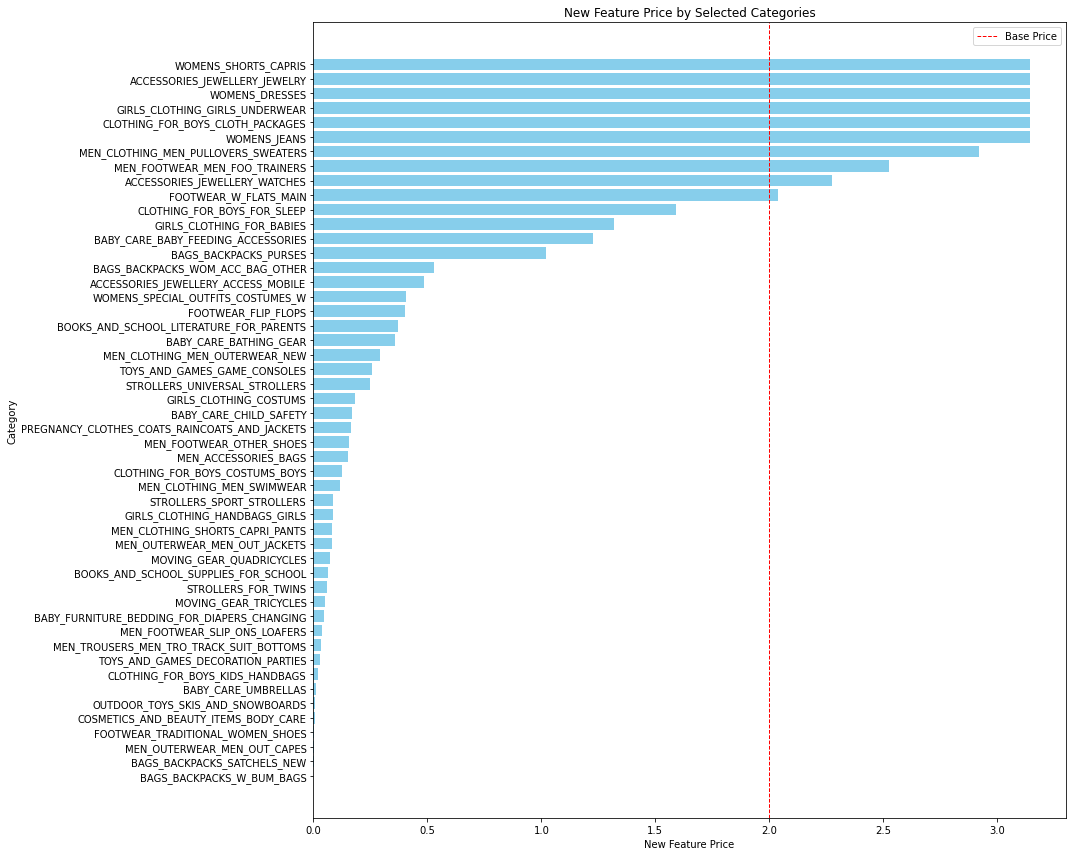

In [17]:
# Assuming your DataFrame is named 'df'
plot_df = df.sample(n=50).sort_values('new_price', ascending=True)
categories = plot_df['all_category']
new_prices = plot_df['new_price']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 12))

# Create the horizontal bar plot
ax.barh(categories, new_prices, color='skyblue')

# Add a dashed baseline at 2
ax.axvline(x=2, color='red', linestyle='--', linewidth=1, label='Base Price')

# Set the plot title and labels
ax.set_title('New Feature Price by Selected Categories')
ax.set_xlabel('New Feature Price')
ax.set_ylabel('Category')

# Adjust the layout and display the plot
plt.tight_layout()
plt.legend()
plt.show()